<a href="https://colab.research.google.com/github/Eugeneantientropy/ML100Days/blob/main/HW_Day_80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
常見的 optimizer 包含
SGD
RMSprop
AdaGrad
Adam

In [39]:
import os
import keras

In [40]:
train, test = keras.datasets.cifar10.load_data()


In [41]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [42]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [43]:
def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128]):
    input_layer = keras.layers.Input(input_shape)

    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [44]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer1 (Dense)                │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer2 (Dense)                │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer3 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9766 - loss: 0.0794 - val_accuracy: 0.5280 - val_loss: 3.8162
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9874 - loss: 0.0453 - val_accuracy: 0.5142 - val_loss: 3.9198
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9796 - loss: 0.0639 - val_accuracy: 0.5309 - val_loss: 3.8168
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9979 - loss: 0.0164 - val_accuracy: 0.5292 - val_loss: 3.8420
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9964 - loss: 0.0203 - val_accuracy: 0.5046 - val_loss: 4.0414
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9175 - loss: 0.2515 - val_accuracy: 0.5312 - val_loss: 3.7478
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9970 - loss: 0.0196 - val_accuracy: 0.5265 - val_loss: 3.7971
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9990 - loss: 0.0117 - val_acc

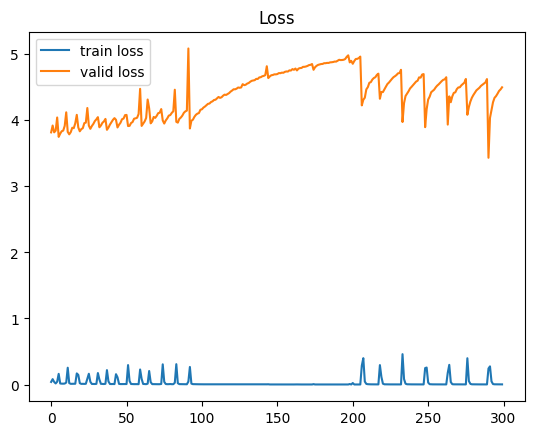

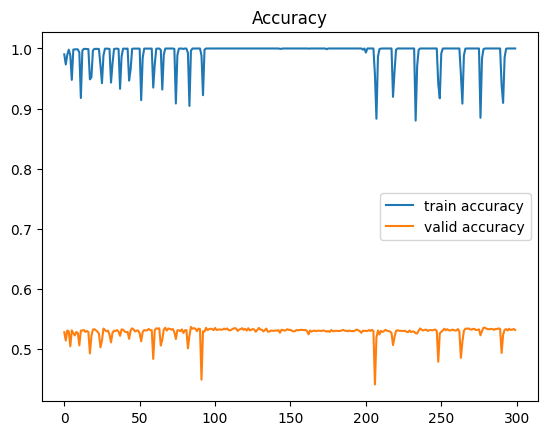

In [21]:
import matplotlib.pyplot as plt

# Initialize lists to store history across all learning rates
all_train_loss = []
all_valid_loss = []
all_train_acc = []
all_valid_acc = []


learning_rates = [0.01, 0.0001, 0.00001]

for lr in learning_rates:
    ## 超參數設定
    LEARNING_RATE = lr
    EPOCHS = 100
    BATCH_SIZE = 256

    optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE) # or another optimizer
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    # Train the model
    history = model.fit(x_train, y_train,  # Assign the history to a variable
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              verbose=1)  # Set verbose to 1 to see training progress

    # Append history for the current learning rate to the overall lists
    all_train_loss.extend(history.history["loss"])
    all_valid_loss.extend(history.history["val_loss"])
    all_train_acc.extend(history.history["accuracy"])
    all_valid_acc.extend(history.history["val_accuracy"])


    # Evaluate the model and print results for the current learning rate
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f"Optimizer: Adam")
    print(f"Results for learning rate: {lr}")
    print(f"Test loss: {loss:.4f}")
    print(f"Test accuracy: {accuracy:.4f}")
    print("-" * 30) # Separator for clarity

# Plotting using the accumulated history
plt.plot(range(len(all_train_loss)), all_train_loss, label="train loss")
plt.plot(range(len(all_valid_loss)), all_valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(all_train_acc)), all_train_acc, label="train accuracy")
plt.plot(range(len(all_valid_acc)), all_valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_10']
Received: inputs=Tensor(shape=(None, 3072))
  warnings.warn(msg)


196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.2081 - loss: 2.1686 - val_accuracy: 0.2856 - val_loss: 1.9597
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3338 - loss: 1.9055 - val_accuracy: 0.3096 - val_loss: 1.9006
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3512 - loss: 1.8343 - val_accuracy: 0.3492 - val_loss: 1.8186
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3755 - loss: 1.7783 - val_accuracy: 0.3550 - val_loss: 1.8149
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3893 - loss: 1.7391 - val_accuracy: 0.3987 - val_loss: 1.7212
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4037 - loss: 1.7021 - val_accuracy: 0.4050 - val_loss: 1.6852
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4106 - loss: 1.6776 - val_accuracy: 0.3871 - val_loss: 1.7089
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4220 - loss: 1.6507 - val_accuracy: 0.417

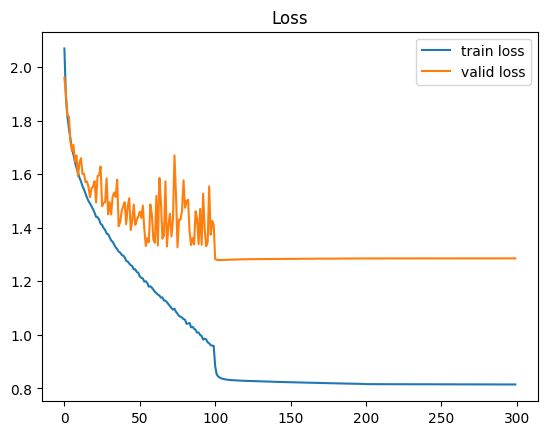

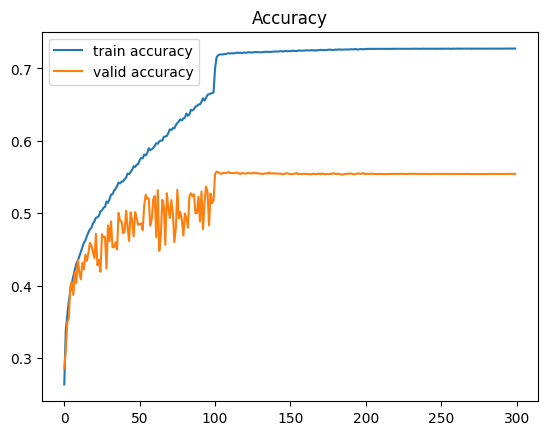

In [30]:
import matplotlib.pyplot as plt

# Initialize lists to store history across all learning rates
all_train_loss = []
all_valid_loss = []
all_train_acc = []
all_valid_acc = []


learning_rates = [0.01, 0.0001, 0.00001]

for lr in learning_rates:
    ## 超參數設定
    LEARNING_RATE = lr
    EPOCHS = 100
    BATCH_SIZE = 256

    optimizer = keras.optimizers.SGD(learning_rate=LEARNING_RATE) # or another optimizer
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    # Train the model
    history = model.fit(x_train, y_train,  # Assign the history to a variable
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              verbose=1)  # Set verbose to 1 to see training progress

    # Append history for the current learning rate to the overall lists
    all_train_loss.extend(history.history["loss"])
    all_valid_loss.extend(history.history["val_loss"])
    all_train_acc.extend(history.history["accuracy"])
    all_valid_acc.extend(history.history["val_accuracy"])


    # Evaluate the model and print results for the current learning rate
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f"Optimizer: Adam")
    print(f"Results for learning rate: {lr}")
    print(f"Test loss: {loss:.4f}")
    print(f"Test accuracy: {accuracy:.4f}")
    print("-" * 30) # Separator for clarity

# Plotting using the accumulated history
plt.plot(range(len(all_train_loss)), all_train_loss, label="train loss")
plt.plot(range(len(all_valid_loss)), all_valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(all_train_acc)), all_train_acc, label="train accuracy")
plt.plot(range(len(all_valid_acc)), all_valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20']
Received: inputs=Tensor(shape=(None, 3072))
  warnings.warn(msg)


196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.2359 - loss: 2.0892 - val_accuracy: 0.3388 - val_loss: 1.8499
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3481 - loss: 1.8374 - val_accuracy: 0.3418 - val_loss: 1.8415
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3823 - loss: 1.7438 - val_accuracy: 0.3466 - val_loss: 1.8227
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4073 - loss: 1.6785 - val_accuracy: 0.3532 - val_loss: 1.7748
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4211 - loss: 1.6467 - val_accuracy: 0.4138 - val_loss: 1.6736
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4344 - loss: 1.6050 - val_accuracy: 0.3478 - val_loss: 1.7967
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4411 - loss: 1.5862 - val_accuracy: 0.4179 - val_loss: 1.6482
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4521 - loss: 1.5570 - val_accuracy: 0.462

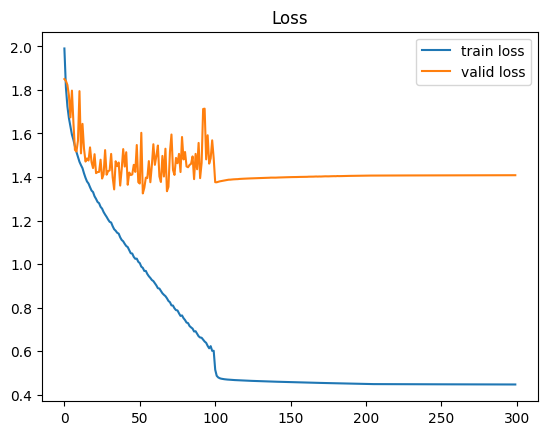

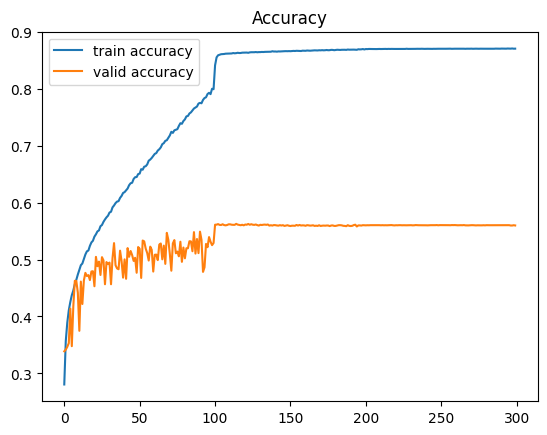

In [46]:
import matplotlib.pyplot as plt

# Initialize lists to store history across all learning rates
all_train_loss = []
all_valid_loss = []
all_train_acc = []
all_valid_acc = []


learning_rates = [0.01, 0.0001, 0.00001]

for lr in learning_rates:
    ## 超參數設定
    LEARNING_RATE = lr
    EPOCHS = 100
    BATCH_SIZE = 256

    optimizer = keras.optimizers.Adagrad(learning_rate=LEARNING_RATE, decay=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    # Train the model
    history = model.fit(x_train, y_train,  # Assign the history to a variable
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              verbose=1)  # Set verbose to 1 to see training progress

    # Append history for the current learning rate to the overall lists
    all_train_loss.extend(history.history["loss"])
    all_valid_loss.extend(history.history["val_loss"])
    all_train_acc.extend(history.history["accuracy"])
    all_valid_acc.extend(history.history["val_accuracy"])


    # Evaluate the model and print results for the current learning rate
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f"Optimizer: Adam")
    print(f"Results for learning rate: {lr}")
    print(f"Test loss: {loss:.4f}")
    print(f"Test accuracy: {accuracy:.4f}")
    print("-" * 30) # Separator for clarity

# Plotting using the accumulated history
plt.plot(range(len(all_train_loss)), all_train_loss, label="train loss")
plt.plot(range(len(all_valid_loss)), all_valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(all_train_acc)), all_train_acc, label="train accuracy")
plt.plot(range(len(all_valid_acc)), all_valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()